In [1]:
import numpy as np
import pandas as pd
import pickle
import re
from datetime import datetime

pd.options.display.max_rows = 50
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import pybliometrics.scopus
import pybliometrics.scopus
# pybliometrics.scopus.utils.create_config()
from pybliometrics.scopus import config, ScopusSearch, AbstractRetrieval,AuthorSearch,AuthorRetrieval,SubjectClassifications
from pybliometrics.scopus import AffiliationSearch,AffiliationRetrieval
from pybliometrics.scopus.exception import Scopus429Error

from tqdm.notebook import tqdm
tqdm.pandas()
import traceback
import sys
from ast import literal_eval

# Add new researcher to publications dataset
in order to add new researcher, get his SCOPUS ID here: https://www.scopus.com/search/form.uri?display=basic#author <br>
Then,
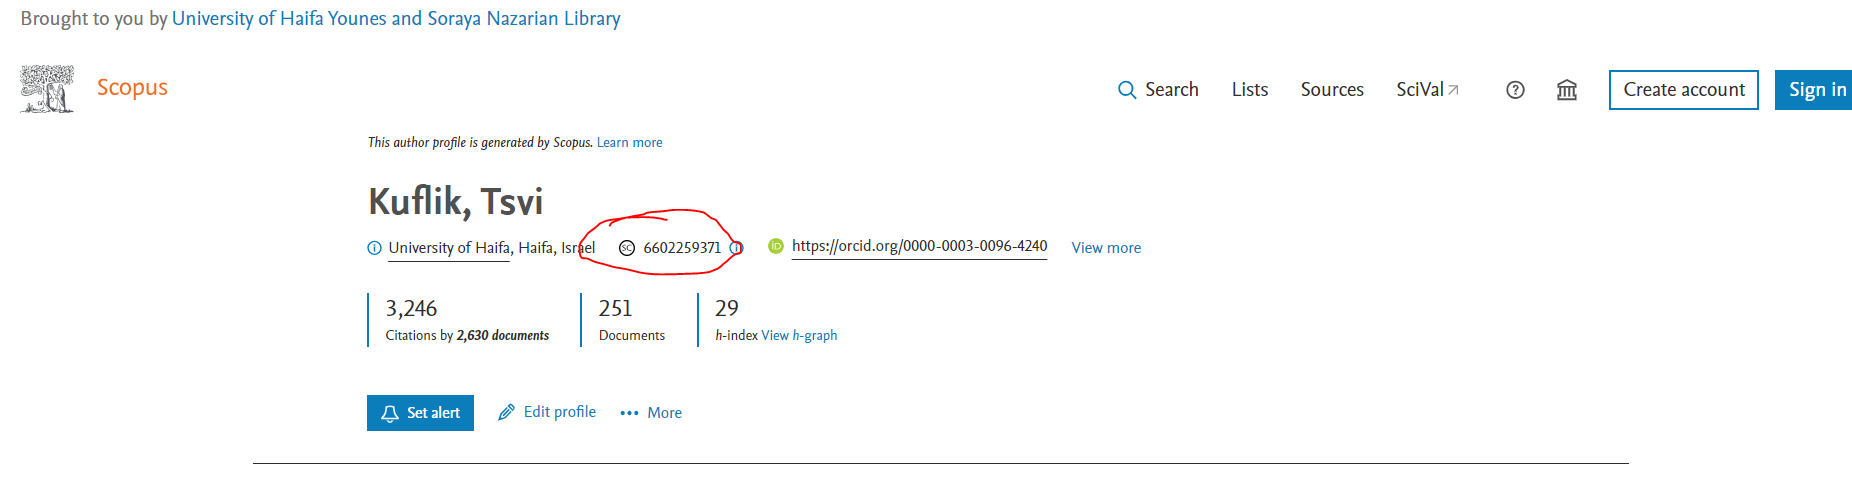

Assign the scopus id inside this parameter and save the new publications dataset

In [ ]:
Get_New_Scopus_ID = 16042672000 

In [10]:
haifas_ids.to_excel('Haifa_Researchers_Affiliations_15_03_2023.xlsx',index=False)

In [2]:
pubs_df = pd.DataFrame(columns = ['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype', 'subtypeDescription',
                                  'creator', 'afid', 'affilname', 'affiliation_city', 'affiliation_country', 'author_count',
                                  'author_names', 'author_ids', 'author_afids', 'coverDate', 'coverDisplayDate',
                                  'publicationName', 'issn', 'source_id', 'eIssn', 'aggregationType', 'volume',
                                  'issueIdentifier', 'article_number', 'pageRange', 'description',
                                  'authkeywords', 'citedby_count', 'openaccess', 'fund_acr', 'fund_no', 'fund_sponsor','scopus_id','Name'])

In [3]:
# single researcher addition
not_found_res = []
try:
    au = AuthorRetrieval(Get_New_Scopus_IDrefresh = True) 
    tmp_df = pd.DataFrame(pd.DataFrame(au.get_documents()))
    tmp_df['scopus_id'] =Get_New_Scopus_ID
    tmp_df['Name'] = 'Enter researcher name'
    tmp_df['Class'] = 0
    tmp_df['Class'] =tmp_df['Class'].astype('object')
    tmp_df['Class_abv'] = 0
    tmp_df['Class_abv'] = tmp_df['Class_abv'].astype('object')
    for j,line in tmp_df.iterrows():
        try:
            p = AbstractRetrieval(line['eid'], view='FULL') #enter ei
            try:
                tmp_df.at[j,'Class'] = ' '.join(list(set(pd.DataFrame(p.subject_areas).area.tolist())))
            except:
                tmp_df.at[j,'Class'] = ''
            try:
                tmp_df.at[j,'Class_abv'] = ' '.join(list(set(pd.DataFrame(p.subject_areas).abbreviation.tolist())))  
            except:
                tmp_df.at[j,'Class_abv'] = ''
        except:
            tmp_df.at[j,'Class'] = ''
            tmp_df.at[j,'Class_abv'] = ''
    pubs_df= pubs_df.append(tmp_df).reset_index(drop=True)
except:
    not_found_res.append('Khoroshkin, Anton S.')
print('Done')

Done


In [5]:
alldf = pd.read_csv(r"C:\vsprojects\Horizon_RecSys\publications_with_abstracts_and_names_classes_v5.csv")

In [6]:
alldf = alldf.append(pubs_df).reset_index(drop=True)

In [7]:
alldf.to_csv('publications_with_abstracts_and_names_classes_v5.csv',index=False)
alldf.to_csv(r"C:\vsprojects\Horizon_RecSys\publications_with_abstracts_and_names_classes_v5.csv",index=False)


## Update haifa's publications

Once in few months, load all the researchers and redownload their publications (including newer ones)

In [2]:
haifas_ids = pd.read_excel(r"C:\vsprojects\Horizon_RecSys\Haifa_Researchers_Affiliations_24_05_2023.xlsx").rename(columns={'Scopus':'Scopus_ID','Pure Name':'Name'})
# segel = pd.read_excel('Haifa_Researchers_Affiliations_07_11_2022.xlsx',dtype={'ID': str,'phone':str}).rename(columns= {'Teudat Zehut':'ID'}).dropna(subset=['Department']).reset_index(drop=True)


In [14]:
not_found_res = []
for _,row in tqdm(haifas_ids.iterrows(),total=haifas_ids.shape[0]):
    try:
        au = AuthorRetrieval(row['Scopus_ID'],refresh = True) 
        tmp_df = pd.DataFrame(pd.DataFrame(au.get_documents()))
        tmp_df['scopus_id'] =row['Scopus_ID']
        tmp_df['Name'] = row['Name']
        tmp_df['Class'] = 0
        tmp_df['Class'] =tmp_df['Class'].astype('object')
        tmp_df['Class_abv'] = 0
        tmp_df['Class_abv'] = tmp_df['Class_abv'].astype('object')
        for j,line in tmp_df.iterrows():
            try:
                p = AbstractRetrieval(line['eid'], view='FULL') #enter ei
                try:
                    tmp_df.at[j,'Class'] = ' '.join(list(set(pd.DataFrame(p.subject_areas).area.tolist())))
                except:
                    tmp_df.at[j,'Class'] = ''
                try:
                    tmp_df.at[j,'Class_abv'] = ' '.join(list(set(pd.DataFrame(p.subject_areas).abbreviation.tolist())))  
                except:
                    tmp_df.at[j,'Class_abv'] = ''
            except:
                tmp_df.at[j,'Class'] = ''
                tmp_df.at[j,'Class_abv'] = ''
        pubs_df= pubs_df.append(tmp_df).reset_index(drop=True)
    except:
        not_found_res.append(row)

  0%|          | 0/1004 [00:00<?, ?it/s]

In [15]:
version_number = 5
pubs_df.to_csv(f'publications_with_abstracts_and_names_classes_v{version_number}.csv',index=False)